In [279]:
import pandas as pd
import numpy as np

In [280]:
data = pd.read_csv('BollywoodMovieDetail.csv')

In [281]:
data.head(15)

,imdbId,movie_title,title_year,releaseDate,genres,writers,director_name,sequel,hitFlop,actor_1_name,actor_2_name,actor_3_name,actor_4_name
0,tt0118578,Albela,2001,20-Apr-01,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Deepak Sareen,0.0,2,Govinda,Aishwarya Rai Bachchan,Jackie Shroff,Namrata Shirodkar
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08-May-02,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Ashutosh Gowariker,0.0,6,Aamir Khan,Gracy Singh,Rachel Shelley,Paul Blackthorne
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02-Jul-04,Action | Comedy,NaN,Pankaj Parashar | S.M. Iqbal,0.0,1,Akshay Kumar,Sridevi,Gulshan Grover,Laxmikant Berde
3,tt0222024,Hum Tumhare Hain Sanam,2002,24-May-02,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,K.S. Adiyaman,0.0,4,Shah Rukh Khan,Madhuri Dixit,Salman Khan,Atul Agnihotri
4,tt0227194,One 2 Ka 4,2001,30-Mar-01,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shashilal K. Nair,0.0,1,Shah Rukh Khan,Juhi Chawla,Jackie Shroff,Nirmal Pandey
5,tt0238936,Devdas,2002,12-Jul-02,Musical | Romance,Saratchandra Chatterjee (based on the novel by...,Sanjay Leela Bhansali,0.0,6,Shah Rukh Khan,Madhuri Dixit,Aishwarya Rai Bachchan,Jackie Shroff
6,tt0247911,Aap Mujhe Achche Lagne Lage,2002,19-Apr-02,Action | Drama | Romance,Robin Bhatt (story) | Girish Dhamija (dialogue...,Vikram Bhatt,0.0,2,Hrithik Roshan,Ameesha Patel,Kiran Kumar,Mukesh Tiwari
7,tt0248126,Kabhi Khushi Kabhie Gham...,2001,14-Dec-01,Drama | Musical | Romance,Karan Johar | Sheena Parikh (screenplay),Karan Johar,0.0,8,Amitabh Bachchan,Jaya Bhaduri,Shah Rukh Khan,Kajol
8,tt0248216,Na Tum Jaano Na Hum,2002,10-May-02,Comedy | Drama | Musical,Pratibha Acharya (dialogue) | Arjun Sablok,Arjun Sablok,0.0,1,Saif Ali Khan,Hrithik Roshan,Esha Deol,Alok Nath
9,tt0248617,Yaadein...,2001,27-Jun-01,Musical | Drama | Romance,Subhash Ghai (dialogue) | Subhash Ghai (screen...,Subhash Ghai,0.0,2,Jackie Shroff,Hrithik Roshan,Kareena Kapoor,Amrish Puri


In [282]:
data.shape

(1284, 13)

In [283]:
data.columns

Index(['imdbId', 'movie_title', 'title_year', 'releaseDate', 'genres',
       'writers', 'director_name', 'sequel', 'hitFlop', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_4_name'],
      dtype='object')

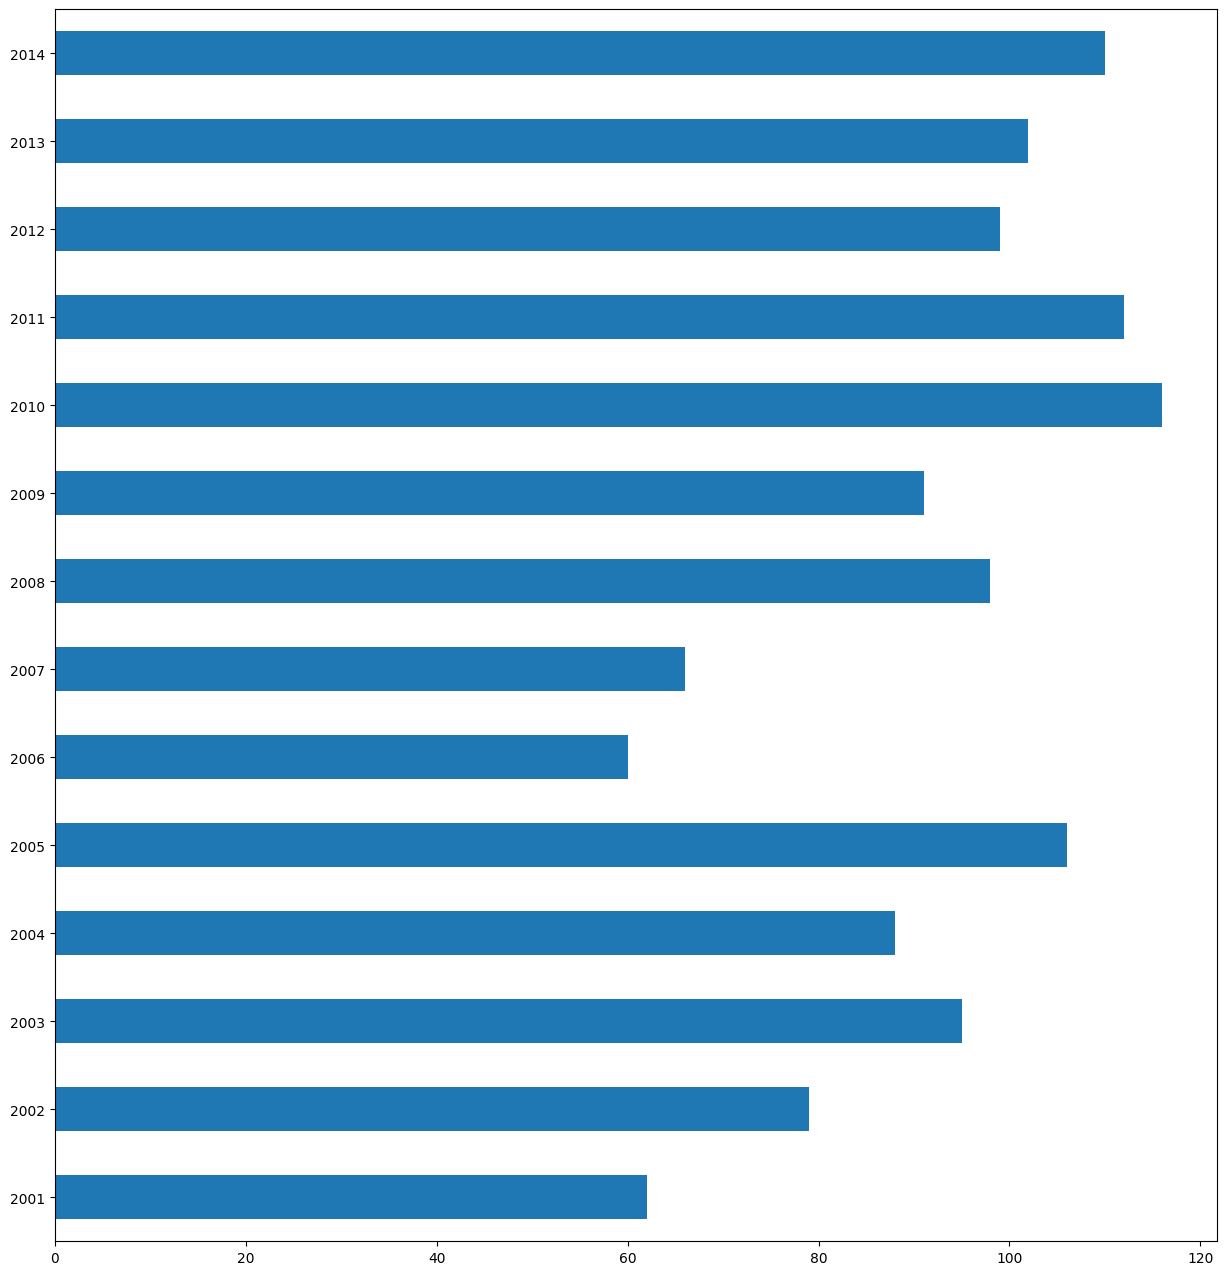

In [284]:
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [285]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [286]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Deepak Sareen,Govinda,Aishwarya Rai Bachchan,Jackie Shroff,Romance,Albela
1,Ashutosh Gowariker,Aamir Khan,Gracy Singh,Rachel Shelley,Adventure | Drama | Musical,Lagaan: Once Upon a Time in India
2,Pankaj Parashar | S.M. Iqbal,Akshay Kumar,Sridevi,Gulshan Grover,Action | Comedy,Meri Biwi Ka Jawab Nahin
3,K.S. Adiyaman,Shah Rukh Khan,Madhuri Dixit,Salman Khan,Drama | Romance,Hum Tumhare Hain Sanam
4,Shashilal K. Nair,Shah Rukh Khan,Juhi Chawla,Jackie Shroff,Action | Comedy | Drama,One 2 Ka 4
5,Sanjay Leela Bhansali,Shah Rukh Khan,Madhuri Dixit,Aishwarya Rai Bachchan,Musical | Romance,Devdas
6,Vikram Bhatt,Hrithik Roshan,Ameesha Patel,Kiran Kumar,Action | Drama | Romance,Aap Mujhe Achche Lagne Lage
7,Karan Johar,Amitabh Bachchan,Jaya Bhaduri,Shah Rukh Khan,Drama | Musical | Romance,Kabhi Khushi Kabhie Gham...
8,Arjun Sablok,Saif Ali Khan,Hrithik Roshan,Esha Deol,Comedy | Drama | Musical,Na Tum Jaano Na Hum
9,Subhash Ghai,Jackie Shroff,Hrithik Roshan,Kareena Kapoor,Musical | Drama | Romance,Yaadein...


In [288]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [289]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Deepak Sareen,Govinda,Aishwarya Rai Bachchan,Jackie Shroff,Romance,Albela
1,Ashutosh Gowariker,Aamir Khan,Gracy Singh,Rachel Shelley,Adventure | Drama | Musical,Lagaan: Once Upon a Time in India
2,Pankaj Parashar | S.M. Iqbal,Akshay Kumar,Sridevi,Gulshan Grover,Action | Comedy,Meri Biwi Ka Jawab Nahin
3,K.S. Adiyaman,Shah Rukh Khan,Madhuri Dixit,Salman Khan,Drama | Romance,Hum Tumhare Hain Sanam
4,Shashilal K. Nair,Shah Rukh Khan,Juhi Chawla,Jackie Shroff,Action | Comedy | Drama,One 2 Ka 4
...,...,...,...,...,...,...
1279,Aarti S. Bagdi | Amrit Raj Gupta | Krishan Hoo...,Kaivalya Chheda,Rajsekhar Aningi,Avidant Bhagat,NaN,Shuruaat Ka Interval
1280,Jitendra Pawar,Manish Choudhary,Suzanna Mukherjee,Poonam Pandey,Horror,Trip to Bhangarh
1281,Chandra Prakash Dwivedi,Adil Hussain,Ekavali Khanna,Kulbhushan Kharbanda,NaN,Zed Plus
1282,Kabir Sadanand,Vir Das,Sandeepa Dhar,Rahul Handa,Comedy,Gollu aur Pappu


In [290]:
data['genres'] = data['genres'].str.replace('|', ' ')

C:\Users\Dipanjan Dhar\AppData\Local\Temp\ipykernel_13212\3923011829.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['genres'] = data['genres'].str.replace('|', ' ')


In [291]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Deepak Sareen,Govinda,Aishwarya Rai Bachchan,Jackie Shroff,Romance,Albela
1,Ashutosh Gowariker,Aamir Khan,Gracy Singh,Rachel Shelley,Adventure Drama Musical,Lagaan: Once Upon a Time in India
2,Pankaj Parashar | S.M. Iqbal,Akshay Kumar,Sridevi,Gulshan Grover,Action Comedy,Meri Biwi Ka Jawab Nahin
3,K.S. Adiyaman,Shah Rukh Khan,Madhuri Dixit,Salman Khan,Drama Romance,Hum Tumhare Hain Sanam
4,Shashilal K. Nair,Shah Rukh Khan,Juhi Chawla,Jackie Shroff,Action Comedy Drama,One 2 Ka 4
...,...,...,...,...,...,...
1279,Aarti S. Bagdi | Amrit Raj Gupta | Krishan Hoo...,Kaivalya Chheda,Rajsekhar Aningi,Avidant Bhagat,NaN,Shuruaat Ka Interval
1280,Jitendra Pawar,Manish Choudhary,Suzanna Mukherjee,Poonam Pandey,Horror,Trip to Bhangarh
1281,Chandra Prakash Dwivedi,Adil Hussain,Ekavali Khanna,Kulbhushan Kharbanda,NaN,Zed Plus
1282,Kabir Sadanand,Vir Das,Sandeepa Dhar,Rahul Handa,Comedy,Gollu aur Pappu


In [292]:
data['movie_title'] = data['movie_title'].str.lower()

In [295]:
data['movie_title'][1]

'lagaan: once upon a time in india'

In [297]:
old = pd.read_csv('new6_data.csv')

In [298]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
6905,Damien Chazelle,Brad Pitt,Margot Robbie,Diego Calva,Drama Comedy,babylon,Brad Pitt Margot Robbie Diego Calva Damien Cha...
6906,Scott Cooper,Christian Bale,Harry Melling,Gillian Anderson,Crime Thriller Mystery Horror,the pale blue eye,Christian Bale Harry Melling Gillian Anderson ...
6907,Marc Forster,Tom Hanks,Mariana Treviño,Rachel Keller,Drama Comedy,a man called otto,Tom Hanks Mariana Treviño Rachel Keller Marc F...
6908,Juel Taylor,John Boyega,Teyonah Parris,Kiefer Sutherland,Science Fiction Comedy Mystery,they cloned tyrone,John Boyega Teyonah Parris Kiefer Sutherland J...


In [299]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [300]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
6905,Damien Chazelle,Brad Pitt,Margot Robbie,Diego Calva,Drama Comedy,babylon,Brad Pitt Margot Robbie Diego Calva Damien Cha...
6906,Scott Cooper,Christian Bale,Harry Melling,Gillian Anderson,Crime Thriller Mystery Horror,the pale blue eye,Christian Bale Harry Melling Gillian Anderson ...
6907,Marc Forster,Tom Hanks,Mariana Treviño,Rachel Keller,Drama Comedy,a man called otto,Tom Hanks Mariana Treviño Rachel Keller Marc F...
6908,Juel Taylor,John Boyega,Teyonah Parris,Kiefer Sutherland,Science Fiction Comedy Mystery,they cloned tyrone,John Boyega Teyonah Parris Kiefer Sutherland J...


In [302]:
new = old.append(data)

C:\Users\Dipanjan Dhar\AppData\Local\Temp\ipykernel_13212\1417740111.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new = old.append(data)


In [304]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
1279,Aarti S. Bagdi | Amrit Raj Gupta | Krishan Hoo...,Kaivalya Chheda,Rajsekhar Aningi,Avidant Bhagat,NaN,shuruaat ka interval,NaN
1280,Jitendra Pawar,Manish Choudhary,Suzanna Mukherjee,Poonam Pandey,Horror,trip to bhangarh,NaN
1281,Chandra Prakash Dwivedi,Adil Hussain,Ekavali Khanna,Kulbhushan Kharbanda,NaN,zed plus,NaN
1282,Kabir Sadanand,Vir Das,Sandeepa Dhar,Rahul Handa,Comedy,gollu aur pappu,NaN


In [305]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [306]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
1279,Aarti S. Bagdi | Amrit Raj Gupta | Krishan Hoo...,Kaivalya Chheda,Rajsekhar Aningi,Avidant Bhagat,NaN,shuruaat ka interval,NaN
1280,Jitendra Pawar,Manish Choudhary,Suzanna Mukherjee,Poonam Pandey,Horror,trip to bhangarh,NaN
1281,Chandra Prakash Dwivedi,Adil Hussain,Ekavali Khanna,Kulbhushan Kharbanda,NaN,zed plus,NaN
1282,Kabir Sadanand,Vir Das,Sandeepa Dhar,Rahul Handa,Comedy,gollu aur pappu,NaN


In [307]:
new.to_csv('new7_data.csv',index=False)